In [1]:
import twpca
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read in the neural data
short_psth = np.genfromtxt('./psth_short_all_neurons_171027.csv', delimiter=',')
long_psth = np.genfromtxt('./psth_long_all_neurons_171027.csv', delimiter=',')

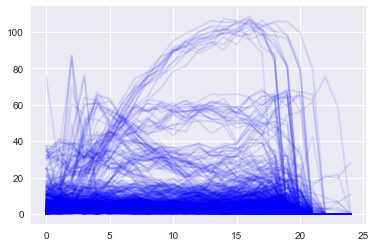

In [3]:
plt.plot(short_psth.T, 'b', alpha=0.1);

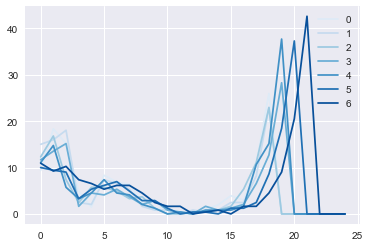

In [4]:
with sns.color_palette('Blues', 7):
    for i in range(7):
        plt.plot(short_psth[i,:], label=str(i))
    
plt.legend()

In [72]:
long_psth.shape

(945, 46)

In [73]:
945/7

135.0

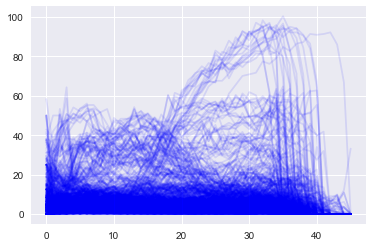

In [5]:
plt.plot(long_psth.T, 'b', alpha=0.1);

In [145]:
reshaped_short_psth = np.reshape(short_psth, (105, 7, -1))
reshaped_long_psth = np.reshape(long_psth, (105, 9, -1))

n_neurons, n_periods_short, n_t_short = reshaped_short_psth.shape


In [147]:
n_periods_short

7

In [140]:
print(reshaped_short_psth.shape)
print(reshaped_long_psth.shape)

(105, 7, 25)
(105, 9, 46)


In [132]:
a = np.array(reshaped_short_psth)

In [143]:
reshaped_short_pad = np.lib.pad(a, ((0,0), (0,0), (0,46-25)), 'constant', constant_values=(0, 0))
reshaped_all_pad = np.concatenate((reshaped_long_psth, reshaped_short_pad), axis=1)

(105, 7, 46)

In [152]:
reshaped_all_pad.shape

(105, 16, 46)

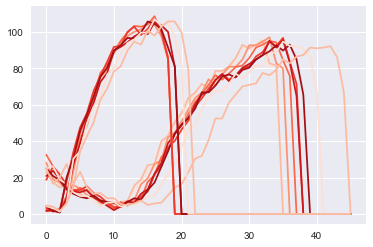

In [154]:
neuron1 = reshaped_all_pad[11,:,:]
with sns.color_palette('Reds', 7):
    plt.plot(neuron1.T);

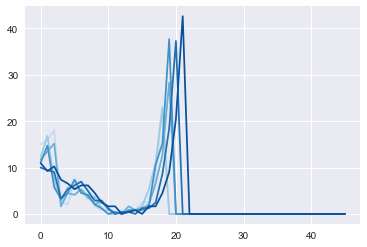

In [144]:
neuron1 = reshaped_short_pad[0,:,:]
with sns.color_palette('Blues', 7):
    plt.plot(neuron1.T);

In [22]:
swapped.shape

(7, 25, 1)

In [ ]:
swapped = np.swapaxes(reshaped_short_psth, 0, 2)
swapped = np.swapaxes(swapped, 0, 1)
#swapped = swapped[:,:,11:13]
#swapped = swapped[:,:,np.newaxis]

model = twpca.TWPCA(n_components=1)
model.fit(swapped)
aligned = model.transform()

In [158]:
swapped_all.shape

(16, 46, 105)

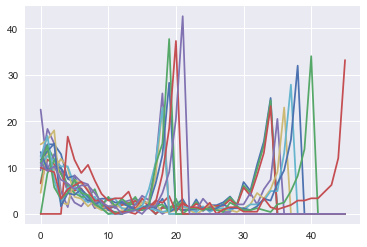

In [159]:
plt.plot(swapped_all[:,:,0].T);

In [118]:
swapped_long = np.swapaxes(reshaped_long_psth, 0, 2)
swapped_long = np.swapaxes(swapped_long, 0, 1)
#swapped = swapped[:,:,11:13]
#swapped = swapped[:,:,np.newaxis]

model_long = twpca.TWPCA(n_components=1)
model_long.fit(swapped_long)
aligned_long = model_long.transform()

100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 471.66it/s]


In [155]:
swapped_all = np.swapaxes(reshaped_all_pad, 0, 2)
swapped_all = np.swapaxes(swapped_all, 0, 1)
#swapped = swapped[:,:,11:13]
#swapped = swapped[:,:,np.newaxis]

model_all = twpca.TWPCA(n_components=1)
model_all.fit(swapped_all)
aligned_all = model_all.transform()

100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 391.24it/s]


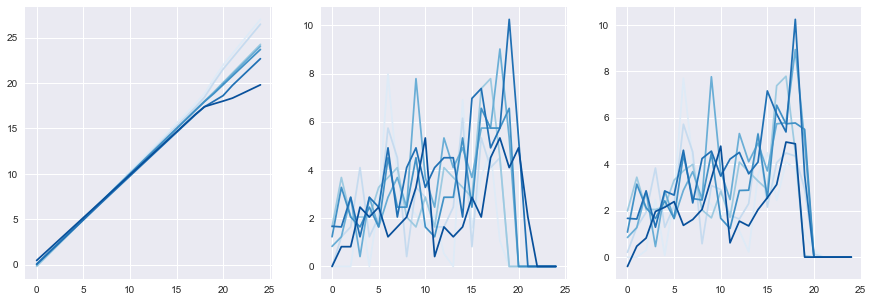

In [161]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = model.params['warp']
palette = sns.palettes.color_palette('Blues', 7)
neuron_id = 6

for i in range(7):
    ax[0].plot(a[i,:], color=palette[i]) 

before_align = swapped[:,:,neuron_id]
for i in range(7):
    ax[1].plot(before_align[i,:], color=palette[i]);    
    
after_align = aligned[:,:,neuron_id]
for i in range(7):
    ax[2].plot(after_align[i,:], color=palette[i]);

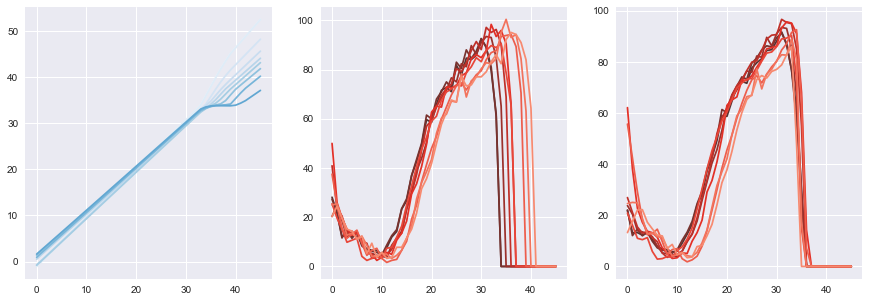

In [189]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = model_long.params['warp']
palette_reds = sns.palettes.color_palette('Reds_d', 9)
neuron_id = 12

for i in range(9):
    ax[0].plot(a[i,:], color=palette_reds[i]) 

before_align = swapped_long[:,:,neuron_id]
for i in range(9):
    ax[1].plot(before_align[i,:], color=palette_reds[i]);    
    
after_align = aligned_long[:,:,neuron_id]
for i in range(9):
    ax[2].plot(after_align[i,:], color=palette_reds[i]);

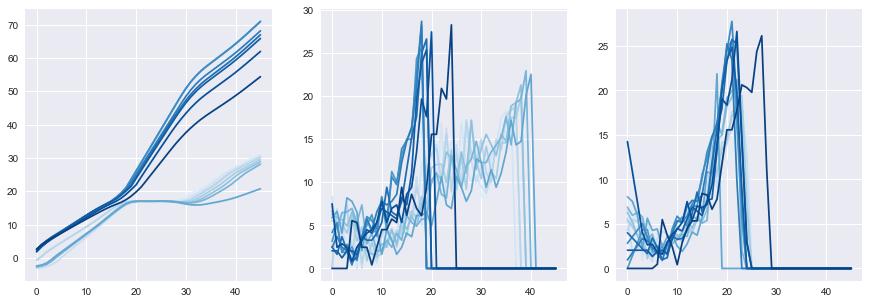

In [190]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = model_all.params['warp']
palette_blues = sns.palettes.color_palette('Blues', 16)
neuron_id = 3

for i in range(16):
    ax[0].plot(a[i,:], color=palette_blues[i]) 

before_align = swapped_all[:,:,neuron_id]
for i in range(16):
    ax[1].plot(before_align[i,:], color=palette_blues[i]);    
    
after_align = aligned_all[:,:,neuron_id]
for i in range(16):
    ax[2].plot(after_align[i,:], color=palette_blues[i]);

In [205]:
swapped_all.shape

(16, 46, 105)

In [206]:
swapped_single = swapped_all[[0, 15],:,4]
#swapped_single = swapped_all[:,:,np.newaxis]
model_single = twpca.TWPCA(n_components=1)
model_single.fit(swapped_single)
aligned_single = model_single.transform()

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 1274.35it/s]


IndexError: index 2 is out of bounds for axis 0 with size 2

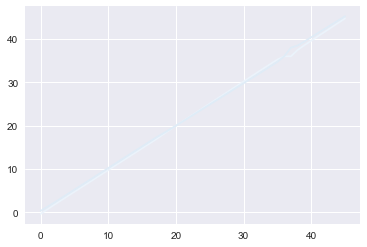

In [207]:
warp = model_single.params['warp']

for i in range(7):
    plt.plot(warp[i,:], color=palette_blues[i]);
    
for i in range(9):
    plt.plot(warp[i + 7,:], color=palette_reds[i]);

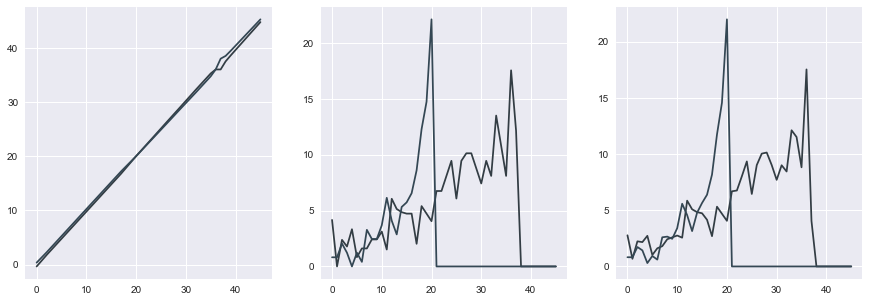

In [209]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = model_single.params['warp']
palette_blues = sns.palettes.color_palette('Blues_d', 16)
neuron_id = 3

for i in range(a.shape[0]):
    ax[0].plot(a[i,:], color=palette_blues[i]) 

before_align = swapped_single
for i in range(a.shape[0]):
    ax[1].plot(before_align[i,:], color=palette_blues[i]);    
    
after_align = aligned_single
for i in range(a.shape[0]):
    ax[2].plot(after_align[i,:], color=palette_blues[i]);

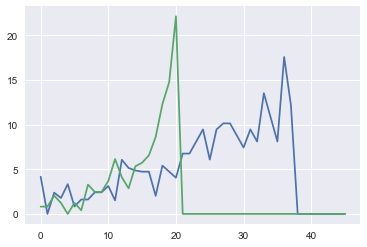

In [210]:
plt.plot(before_align.T);


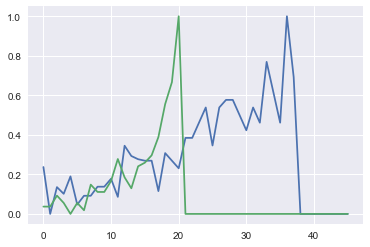

In [220]:
normed = (before_align.T / np.max(before_align, axis=1)).T
plt.plot(normed.T)

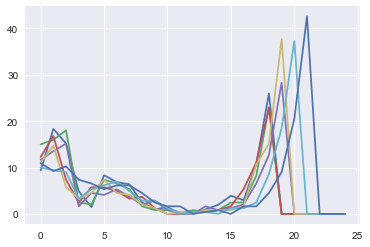

In [60]:
plt.plot(swapped[:,:,0].T);

In [10]:
palette

[(0.87021914648212229, 0.92132256824298342, 0.9685044213763937),
 (0.77524029219530954, 0.85830065359477115, 0.93682429834678971),
 (0.61725490196078436, 0.79086505190311418, 0.88184544405997689),
 (0.41708573625528644, 0.68063052672049218, 0.83823144944252215),
 (0.25628604382929643, 0.57001153402537486, 0.77516339869281048),
 (0.1271049596309112, 0.44018454440599769, 0.70749711649365632),
 (0.031372549019607843, 0.3140945790080738, 0.60648981161091897)]

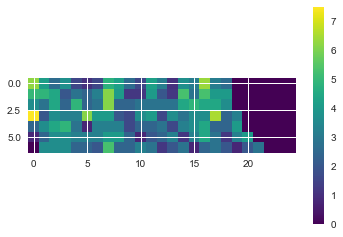

In [11]:
plt.imshow(swapped[:,:,0], cmap='viridis')
plt.colorbar()

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 1589.93it/s]


In [58]:
aligned.shape

(7, 25, 1)

In [95]:
neuron1 = swapped[:,:,12]
with sns.color_palette('Blues', 7):
    plt.plot(neuron1.T);

IndexError: index 12 is out of bounds for axis 2 with size 1

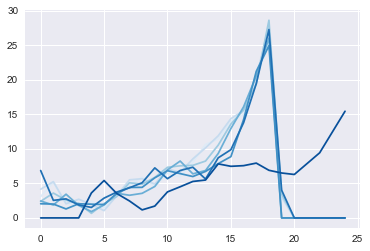

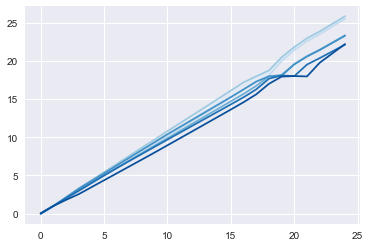